# Pontifícia Universidade Católica do Rio de Janeiro

(Pedro Henrique Domingues - Departamento de Engenharia Mecânica)

**Pesquisa:** Detecção e estimação de defeitos em pás de turbinas eólicas sujeitas a variações climáticas a partir do monitoramento de sinais de vibração  e *machine learning*.

**Dados:** Os dados utilizados estão presente em https://github.com/ETH-WindMil/Sonkyo-Benchmark

**Importing Packages**

In [1]:
import lvm_read
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

**Functions**

In [2]:
from WTManager import WTmanager
from WTManager import get_signal, approx

In [3]:
#file_path = 'D:\\Datasets\\Wind-Turbines\\'
file_path = 'C:\\Users\\hss19\\Documents\\TCC\\code\\'
manager = WTmanager(file_path)

# To obtain the table, you may use: table = manager.get_all_files() and export with table.to_excel('table.xlsx')

,Case,Temperature,Sensor_scheme,Wave_type,Wave,Address
0,R,(+00),1,sine_sweep,sine_sweep,C:\Users\hss19\Documents\TCC\code\Case_R_(+00)...
1,R,(+00),1,white_noise,white_noise_1,C:\Users\hss19\Documents\TCC\code\Case_R_(+00)...
2,R,(+00),1,white_noise,white_noise_2,C:\Users\hss19\Documents\TCC\code\Case_R_(+00)...
3,R,(+00),1,white_noise,white_noise_3,C:\Users\hss19\Documents\TCC\code\Case_R_(+00)...
4,R,(+00),1,white_noise,white_noise_4,C:\Users\hss19\Documents\TCC\code\Case_R_(+00)...



##########
Possible values:
##########
Cases: ['R' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L']
Temperature: ['(+00)' '(+05)' '(+10)' '(+15)' '(+20)' '(+25)' '(+30)' '(+35)' '(+40)'
 '(-05)' '(-10)' '(-15)']
Sensor_scheme: ['1' '2']
Wave_type: ['sine_sweep' 'white_noise']
Wave: ['sine_sweep' 'white_noise_1' 'white_noise_2' 'white_noise_3'
 'white_noise_4' 'white_noise_5' 'white_noise_6' 'white_noise_7'
 'white_noise_8' 'white_noise_9' 'white_noise_10' 'white_noise_11'
 'white_noise_12' 'white_noise_13' 'white_noise_14' 'white_noise_15'
 'white_noise_16' 'white_noise_17' 'white_noise_18' 'white_noise_19'
 'white_noise_20']
Total number of cases: 2232


**Loading Section**

In the future, you'll may load the files through the guide file.

PS: Remember to always check if the content was already unzipped

How to get signals:

In [4]:
##### Selecting file #####
case = 'R'
temp = '(+00)'
scheme = '2'
wave = 'white_noise_1'
cR_t0_s1_wSS = manager.load(case, temp, scheme, wave, flag_output=True)

cR_t0_s1_wSS_time = get_signal(cR_t0_s1_wSS, "X_Value")
cR_t0_s1_wSS_force = get_signal(cR_t0_s1_wSS, "Strain_6_2")

LVM Keys: dict_keys(['Decimal_Separator', 'Writer_Version', 'Reader_Version', 'Separator', 'Multi_Headings', 'X_Columns', 'Time_Pref', 'Operator', 'Date', 'Time', 0, 'Segments'])
LVM presents 40 channels
With the names: ['X_Value', 'Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8', 'K7861_H', 'K7862_H', 'K7861_T', 'K7862_T', 'force', 'Strain_1', 'Strain_2', 'Strain_3_rosette_A', 'Strain_4_rosette_B', 'Strain_5_rosette_C', 'Strain_6_2', 'Strain_7_2', 'Strain_8', 'Strain_9_2', 'Strain_10_2', 'Strain_11_2', 'Strain_12_rosette_A', 'Strain_13_rosette_B', 'Strain_14_rosette_C', 'Strain_15_2', 'Strain_16_temp_comp', 'Strain_17_rosette_A', 'Strain_18_rosette_B', 'Strain_19_rosette_C', 'Strain_20_rosette_A', 'Strain_21_rosette_B', 'Strain_22_rosette_C', 'Strain_23', 'Strain_24', 'Strain_16_temp_comp (Filtered)', 'Comment']


In [5]:
cR_t0_s1_wSS_time.shape[0]

211582

<font size="14">Wind Turbine blade instrumentation:</font>

<img src="./WT-blade-instrumentation.png" width="1000"/>

<font size="14">Possible signals:</font>

**Time vector**: 'X_Value';

**Accelerometers**:  'Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8';

**Strain gauges**: 'Strain_1', 'Strain_2', 'Strain_3_rosette_A', 'Strain_4_rosette_B', 'Strain_5_rosette_C', 'Strain_6_1', 'Strain_7_1', 'Strain_8', 'Strain_9_1_rosette_A', 'Strain_10_1_rosette_B', 'Strain_11_1_rosette_C', 'Strain_12_rosette_A', 'Strain_13_rosette_B', 'Strain_14_rosette_C', 'Strain_15_1', 'Strain_16_temp_comp', 'Strain_17_rosette_A', 'Strain_18_rosette_B', 'Strain_19_rosette_C', 'Strain_20_rosette_A', 'Strain_21_rosette_B', 'Strain_22_rosette_C', 'Strain_23', 'Strain_24';

**Humidity sensors**: 'K7861_H', 'K7862_H';

**Temperature sensors**: 'K7861_T', 'K7862_T';

**Force transducer**: 'force';

**Strain gauge for temperature compensation**: 'Strain_16_temp_comp (Filtered)';

**Comments**: 'comment'.

## Plots

Force plots in R case, sensing set-up 1 and temperature of 0 C degree (teal) e 40 C degrees (lavanda). The signals are response for the sine sweep (teal) and the first white noise frequency (lavanda) excitations, and are represented in their completeness (A, C) and in a window delimited by the orange line with the first 20 seconds of signal (B, D), in order to better detail the data

In [6]:
####
case = 'R'
temp = '(+00)'
scheme = '1'
wave = "sine_sweep"#'white_noise_1'
cR_t0_s1_wSS = manager.load(case, temp, scheme, wave, flag_output=True)

cR_t0_s1_wSS_time = get_signal(cR_t0_s1_wSS, "X_Value")
cR_t0_s1_wSS_force = get_signal(cR_t0_s1_wSS, "Ch7")

##### Selecting file #####
case = 'D'
temp = '(+00)'
scheme = '1'
wave = "sine_sweep"#'white_noise_1'
cR_t40_s1_wWN1 = manager.load(case, temp, scheme, wave, flag_output=True)

cR_t40_s1_wWN1_time = get_signal(cR_t40_s1_wWN1, "X_Value")
cR_t40_s1_wWN1_force = get_signal(cR_t40_s1_wWN1, "Ch7")

LVM Keys: dict_keys(['Decimal_Separator', 'Writer_Version', 'Reader_Version', 'Separator', 'Multi_Headings', 'X_Columns', 'Time_Pref', 'Operator', 'Date', 'Time', 0, 'Segments'])
LVM presents 40 channels
With the names: ['X_Value', 'Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8', 'K7861_H', 'K7862_H', 'K7861_T', 'K7862_T', 'force', 'Strain_1', 'Strain_2', 'Strain_3_rosette_A', 'Strain_4_rosette_B', 'Strain_5_rosette_C', 'Strain_6_1', 'Strain_7_1', 'Strain_8', 'Strain_9_1_rosette_A', 'Strain_10_1_rosette_B', 'Strain_11_1_rosette_C', 'Strain_12_rosette_A', 'Strain_13_rosette_B', 'Strain_14_rosette_C', 'Strain_15_1', 'Strain_16_temp_comp', 'Strain_17_rosette_A', 'Strain_18_rosette_B', 'Strain_19_rosette_C', 'Strain_20_rosette_A', 'Strain_21_rosette_B', 'Strain_22_rosette_C', 'Strain_23', 'Strain_24', 'Strain_16_temp_comp (Filtered)', 'Comment']
LVM Keys: dict_keys(['Decimal_Separator', 'Writer_Version', 'Reader_Version', 'Separator', 'Multi_Headings', 'X_Columns', 'Time_Pref', 'Ope

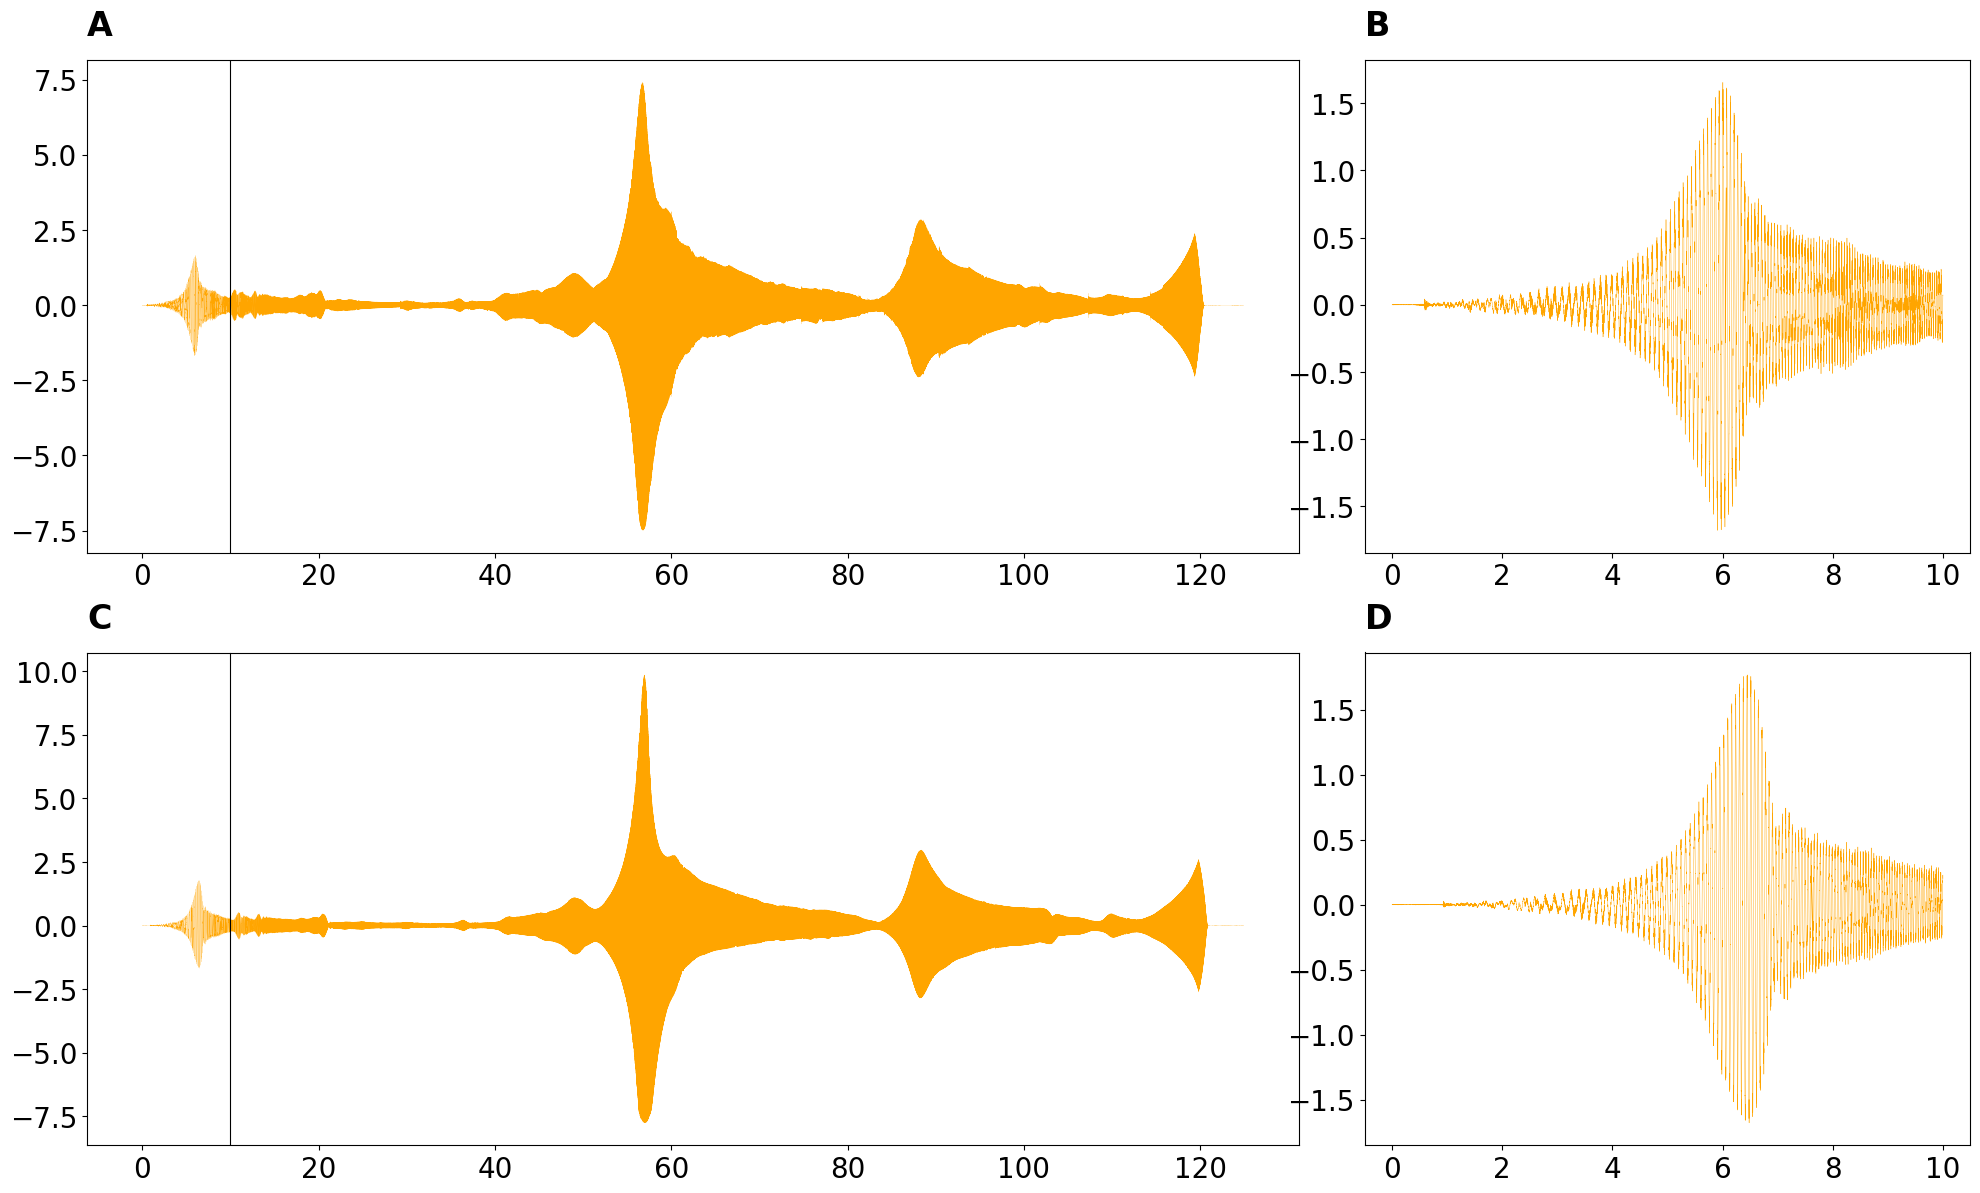

In [7]:
font_size = 20
line_width = 0.1
fig_size = (20,12)
textx = 0
texty = 1.05
zoom = 10

fig, ax = plt.subplots(figsize=fig_size, nrows=2, ncols=2, gridspec_kw={'width_ratios': [4, 2]})
fig.patch.set_facecolor('xkcd:white')
ax = ax.flatten()

# Force plot - Case R, Temperature 0, Layout 1, Sine Sweep
final_index = approx(cR_t0_s1_wSS_time, zoom)
c1, c2 = 'orange', 'k'

no=0
ax[no].plot(cR_t0_s1_wSS_time, cR_t0_s1_wSS_force, linewidth=line_width, color=c1)
ax[no].tick_params(axis='both', labelsize=font_size);
#ax[no].set_ylim([-7, 7]);
ax[no].axvline(x=cR_t0_s1_wSS_time[final_index], linewidth=8*line_width, color = c2);
ax[no].text(textx, texty, string.ascii_uppercase[no], transform=ax[no].transAxes, 
    size=font_size+4, weight='bold')

no=1
ax[no].plot(cR_t0_s1_wSS_time[:final_index], cR_t0_s1_wSS_force[:final_index], linewidth=line_width*3, color=c1)
ax[no].tick_params(axis='both', labelsize=font_size);
#ax[no].set_ylim([-7, 7]);
ax[no].text(textx, texty, string.ascii_uppercase[no], transform=ax[no].transAxes, 
    size=font_size+4, weight='bold')

final_index = approx(cR_t40_s1_wWN1_time, zoom)
c1, c2 = 'orange', 'k'

# Force plot - Case R, Temperature 40, Layout 1, White Noise 1
no=2
ax[no].plot(cR_t40_s1_wWN1_time, cR_t40_s1_wWN1_force, linewidth=line_width, color=c1)
ax[no].tick_params(axis='both', labelsize=font_size);
# ax[no].set_ylim([-7, 7]);
ax[no].axvline(x=cR_t40_s1_wWN1_time[final_index], linewidth=8*line_width, color = c2);
ax[no].text(textx, texty, string.ascii_uppercase[no], transform=ax[no].transAxes, 
    size=font_size+4, weight='bold')

no=3
ax[no].plot(cR_t40_s1_wWN1_time[:final_index], cR_t40_s1_wWN1_force[:final_index], linewidth=line_width*3, color=c1)
ax[no].tick_params(axis='both', labelsize=font_size);
# ax[no].set_ylim([-7, 7]);
ax[no].text(textx, texty, string.ascii_uppercase[no], transform=ax[no].transAxes, 
    size=font_size+4, weight='bold')




fig.tight_layout()
plt.show()



### PCA

In [8]:
# Dados coletados
print(cR_t0_s1_wSS[0]['data'].shape)
print(len(cR_t0_s1_wSS[0]['Channel names']))
print(cR_t0_s1_wSS[0]['Channel names'])

(208250, 39)
40
['X_Value', 'Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8', 'K7861_H', 'K7862_H', 'K7861_T', 'K7862_T', 'force', 'Strain_1', 'Strain_2', 'Strain_3_rosette_A', 'Strain_4_rosette_B', 'Strain_5_rosette_C', 'Strain_6_1', 'Strain_7_1', 'Strain_8', 'Strain_9_1_rosette_A', 'Strain_10_1_rosette_B', 'Strain_11_1_rosette_C', 'Strain_12_rosette_A', 'Strain_13_rosette_B', 'Strain_14_rosette_C', 'Strain_15_1', 'Strain_16_temp_comp', 'Strain_17_rosette_A', 'Strain_18_rosette_B', 'Strain_19_rosette_C', 'Strain_20_rosette_A', 'Strain_21_rosette_B', 'Strain_22_rosette_C', 'Strain_23', 'Strain_24', 'Strain_16_temp_comp (Filtered)', 'Comment']


In [9]:
# Extraindo os dados
x_time = cR_t0_s1_wSS[0]['data'][:,0]
print(x_time.shape)

y_val = cR_t0_s1_wSS[0]['data'][:,1:]
print(y_val.shape)

(208250,)
(208250, 38)


In [10]:
# Centralizando dados
y_mean = np.mean(y_val,axis=0)
print(y_mean.shape)

M = y_val - y_mean
print(M.shape)

(38,)
(208250, 38)


In [11]:
#Matriz de covariancia
Cov = M.T.dot(M) / (M.shape[-1] -1)
Cov.shape

(38, 38)

In [12]:
# Autovetores e autovalores
eigval, eigvec = np.linalg.eig(Cov)
eigval.shape, eigvec.shape

((38,), (38, 38))

In [13]:
# Ordenando autovalores
[(eigval[i], eigvec[:,i]) for i in range(len(eigval))].sort(reverse = True)
eigval

array([1.20489766e+04, 9.85539040e+03, 7.48802153e+03, 2.63421926e+03,
       1.29464508e+03, 1.03708280e+02, 4.89837797e+01, 4.37383002e+01,
       1.48521491e+01, 4.62070020e+00, 5.39177564e-01, 1.57648139e-01,
       7.24795631e-02, 3.63832704e-07, 2.30630959e-07, 2.91973600e-08,
       2.47156317e-08, 9.04297970e-09, 8.01621972e-09, 4.45733676e-09,
       3.81295587e-09, 3.28603028e-09, 2.59105394e-09, 1.91672185e-09,
       1.40266297e-09, 9.77909096e-10, 9.54983648e-10, 9.00412950e-10,
       6.73764414e-10, 8.38132149e-10, 7.00388890e-10, 8.06083975e-10,
       7.35280466e-10, 7.38382295e-10, 7.84690108e-10, 7.56684272e-10,
       7.71876111e-10, 7.70731712e-10])

In [14]:
# Variancia explicada
total = sum(eigval)
var_exp = eigval/total
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[3.59264220e-01 2.93858081e-01 2.23270266e-01 7.85444905e-02
 3.86024199e-02 3.09226879e-03 1.46054889e-03 1.30414448e-03
 4.42846387e-04 1.37775373e-04 1.60766523e-05 4.70059306e-06
 2.16112244e-06 1.08483962e-11 6.87672108e-12 8.70577403e-13
 7.36945754e-13 2.69634439e-13 2.39019546e-13 1.32904368e-13
 1.13690869e-13 9.79795334e-14 7.72574304e-14 5.71508771e-14
 4.18231882e-14 2.91583061e-14 2.84747383e-14 2.68476043e-14
 2.00896271e-14 2.49905783e-14 2.08834888e-14 2.40349981e-14
 2.19238506e-14 2.20163378e-14 2.33970974e-14 2.25620477e-14
 2.30150226e-14 2.29809001e-14]
[0.35926422 0.6531223  0.87639257 0.95493706 0.99353948 0.99663175
 0.9980923  0.99939644 0.99983929 0.99997706 0.99999314 0.99999784
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


In [15]:
# Realizando PCA
n = 5
y_pca = np.dot(y_val,eigvec[0:n].T)
y_pca

array([[ 1.49150501,  5.23378551, -3.28098336,  1.07428017,  3.17830765],
       [ 1.49052383,  5.2311155 , -3.27934159,  1.07349708,  3.17722961],
       [ 1.48780575,  5.22480344, -3.27544094,  1.0714332 ,  3.17244104],
       ...,
       [ 1.48230914,  5.20130631, -3.26979494,  1.065496  ,  3.15710964],
       [ 1.4804796 ,  5.19366285, -3.26508739,  1.06421517,  3.15372285],
       [ 1.47881194,  5.18855429, -3.26144216,  1.061977  ,  3.14938833]])

In [16]:
# PCA utilizando biblioteca
from sklearn.decomposition import PCA
pca = PCA(n_components=n)
y_pca2 = pca.fit(y_val)

print("Covariancia")
print(y_pca2.get_covariance())
print("Componentes")
print(y_pca2.components_) # componentes = autovetores
print("Variancia")
print(y_pca2.explained_variance_)
print(y_pca2.explained_variance_ratio_)

print("PCA")
y_pca2 = y_pca2.transform(y_val)
print(y_pca2.shape)
print(y_pca2)

Covariancia
[[ 4.33213854e-01  1.27941217e-01  2.23027196e-01 ...  6.60346235e-08
  -7.27675063e-07 -7.06727933e-10]
 [ 1.27941217e-01  3.11300599e-01 -1.40170369e-02 ... -4.58067201e-07
  -8.42229589e-07  9.79709403e-10]
 [ 2.23027196e-01 -1.40170369e-02  2.92887373e-01 ...  1.73527340e-08
  -5.16148281e-07 -4.83093618e-11]
 ...
 [ 6.60346235e-08 -4.58067201e-07  1.73527340e-08 ...  1.16656431e-03
   3.63418759e-12 -1.17641162e-14]
 [-7.27675063e-07 -8.42229589e-07 -5.16148281e-07 ...  3.63418759e-12
   1.16656431e-03 -1.16239186e-14]
 [-7.06727933e-10  9.79709403e-10 -4.83093618e-11 ... -1.17641162e-14
  -1.16239186e-14  1.16656431e-03]]
Componentes
[[-1.47065385e-01  2.10036410e-01 -2.23912550e-01 -1.21550458e-01
  -5.52842045e-01  2.24252751e-01 -4.65144963e-01  1.53157056e-01
   1.34165267e-05 -3.53889096e-05  3.26590542e-06  2.76007435e-06
  -5.23072260e-01 -7.20091833e-09 -3.93220119e-07 -8.42631088e-07
  -2.49834100e-07  6.37764134e-07 -2.18250961e-07 -3.30647106e-07
  -6.07437

Testing

In [17]:
a = np.array([[1,1],[2,2],[3,3],[4,4],[5,5],[1.1,1.5],[3.3,2.2],[1.8,2.2],[4.5,4.1],[3.8,4.1]])
a = a+100
print(a)
a.shape

[[101.  101. ]
 [102.  102. ]
 [103.  103. ]
 [104.  104. ]
 [105.  105. ]
 [101.1 101.5]
 [103.3 102.2]
 [101.8 102.2]
 [104.5 104.1]
 [103.8 104.1]]


(10, 2)

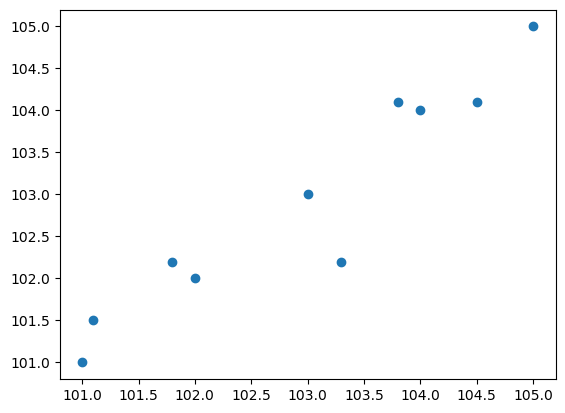

In [18]:
plt.scatter(*zip(*a))

In [19]:
am = a
am = a - a.mean()

M = am.T.dot(am)
print(M)

eigval, eigvec = np.linalg.eig(M)
print(eigval)
print(eigvec)

print(a.mean())

[[18.009 16.051]
 [16.051 15.873]]
[33.027492  0.854508]
[[ 0.73020241 -0.68323089]
 [ 0.68323089  0.73020241]]
102.92999999999999


In [20]:
eigvec[:,1]=-eigvec[:,1]

In [21]:
pca = PCA(n_components=2)
test_pca = pca.fit(a)
test_pca.components_

array([[ 0.73019677,  0.68323691],
       [ 0.68323691, -0.73019677]])

Autoencoding

In [22]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from sklearn import preprocessing

class Autoencoder(Model):
    def __init__(self,latent_dim):
        super(Autoencoder, self).__init__()
        
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(38, activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(1)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

y_norm = preprocessing.Normalizer().fit_transform(y_val)
y_train, y_test = train_test_split(y_norm)
(y_train.shape,y_test.shape)

((156187, 38), (52063, 38))

In [23]:
autoencoder.fit(y_train ,y_train , epochs = 10, validation_data = (y_test, y_test), validation_freq=2)

Epoch 1/10
4881/4881 [==============================] - 6s 1ms/step - loss: 0.0178
Epoch 2/10
4881/4881 [==============================] - 7s 1ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3/10
4881/4881 [==============================] - 5s 927us/step - loss: 0.0011
Epoch 4/10
4881/4881 [==============================] - 7s 1ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/10
4881/4881 [==============================] - 6s 1ms/step - loss: 0.0010
Epoch 6/10
4881/4881 [==============================] - 6s 1ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 7/10
4881/4881 [==============================] - 5s 1ms/step - loss: 0.0010
Epoch 8/10
4881/4881 [==============================] - 6s 1ms/step - loss: 0.0010 - val_loss: 9.9699e-04
Epoch 9/10
4881/4881 [==============================] - 5s 1ms/step - loss: 0.0010
Epoch 10/10
4881/4881 [==============================] - 6s 1ms/step - loss: 0.0010 - val_loss: 9.9400e-04


In [24]:
print(y_test[0],autoencoder(y_test[0:1])[0])

[-2.13407964e-03 -8.62119357e-03 -7.30409394e-03 -1.02430419e-02
 -2.03522963e-03 -1.52194555e-02 -6.50248645e-03 -3.03294400e-02
  6.76808462e-01  6.82048630e-01  1.68968686e-01  1.67755840e-01
 -1.36427465e-01 -1.01192791e-06  7.76913530e-07  4.87426641e-08
 -1.94956272e-07 -5.59958331e-08 -2.55281521e-07 -6.65523628e-07
 -1.26592867e-07 -1.19886717e-06 -1.02153341e-06 -1.06274763e-06
 -1.26148833e-07 -4.16112829e-07 -2.65719375e-07 -6.82002886e-07
  3.80130211e-07 -3.59297733e-07 -2.82898315e-07 -8.83242981e-08
 -6.76601445e-07 -6.63743676e-07 -4.28789016e-07  8.66897138e-07
 -5.46744664e-07 -3.75682426e-07] tf.Tensor(
[1.33190909e-03 6.08843097e-12 5.85205213e-04 9.83634032e-04
 2.76199798e-03 1.27897814e-11 1.17880513e-03 1.92187613e-10
 6.67744875e-01 6.70769155e-01 1.66473240e-01 1.66290313e-01
 7.89509434e-03 2.22073862e-08 2.14073275e-08 2.35617641e-08
 1.92548502e-08 2.29375985e-08 3.51082008e-08 9.13735665e-09
 1.83025222e-08 1.51005395e-08 1.81001631e-08 9.46972190e-09
 7.3

In [25]:
dif = y_test[0]-autoencoder(y_test[0:1])[0]
print(dif)

tf.Tensor(
[-3.4659887e-03 -8.6211935e-03 -7.8892987e-03 -1.1226676e-02
 -4.7972277e-03 -1.5219456e-02 -7.6812916e-03 -3.0329440e-02
  9.0636015e-03  1.1279464e-02  2.4954528e-03  1.4655292e-03
 -1.4432256e-01 -1.0341353e-06  7.5550616e-07  2.5180899e-08
 -2.1421113e-07 -7.8933432e-08 -2.9038972e-07 -6.7466095e-07
 -1.4489538e-07 -1.2139677e-06 -1.0396336e-06 -1.0722174e-06
 -1.3352840e-07 -4.3744268e-07 -2.7345570e-07 -6.9161496e-07
  3.6964730e-07 -3.9473173e-07 -2.9913440e-07 -1.2399592e-07
 -6.9838825e-07 -6.9552436e-07 -4.3772550e-07  8.5530343e-07
 -5.5662844e-07 -4.0842696e-07], shape=(38,), dtype=float32)


In [26]:
np.array(dif**2).sum()/(y_test[0]**2).sum()

0.022554891183972355